In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

In [2]:
import tensorflow as tf
from tensorflow.python import keras

C:\Users\Anu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv("walmart_processed.csv")
dtest=pd.read_csv("test.csv")

In [4]:
dtest.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [5]:
dtest['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in dtest['Date']]
dtest['DateTimeObj'].head()

0   2012-11-02
1   2012-11-09
2   2012-11-16
3   2012-11-23
4   2012-11-30
Name: DateTimeObj, dtype: datetime64[ns]

In [6]:
dtest['month'] = [i.month for i in dtest['DateTimeObj']]

In [7]:
dtest['day'] = [i.day for i in dtest['DateTimeObj']]

In [8]:
dtest['year'] = [i.year for i in dtest['DateTimeObj']]

In [9]:
dtest.head(2)

,Store,Dept,Date,IsHoliday,DateTimeObj,month,day,year
0,1,1,2012-11-02,False,2012-11-02,11,2,2012
1,1,1,2012-11-09,False,2012-11-09,11,9,2012


In [10]:
dtest['IsHolidayInt'] = [int(x) for x in list(dtest.IsHoliday)]

In [11]:
datatest=dtest.drop(['Dept','Date','IsHoliday','DateTimeObj','year'],axis=1)

In [12]:
datatest.head(2)

,Store,month,day,IsHolidayInt
0,1,11,2,0
1,1,11,9,0


In [13]:
datatest.to_csv('datatestprocessed.csv')

In [14]:
df = df.drop(['Unnamed: 0', "Week"], axis=1)

In [15]:
df.head()


,Store,Weekly_Sales,month,day,IsHolidayInt
0,1,1643690.90,2,5,0
1,1,1641957.44,2,12,1
2,1,1611968.17,2,19,0
3,1,1409727.59,2,26,0
4,1,1554806.68,3,5,0


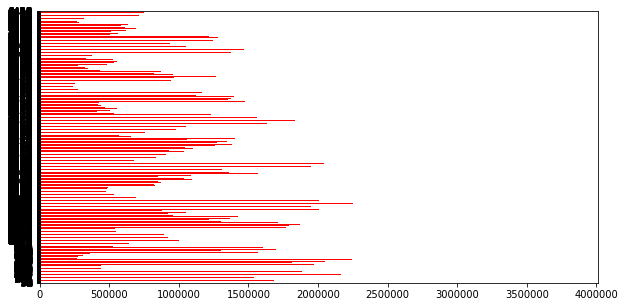

In [16]:
y = df['Weekly_Sales']
ymax = y.max()
y = y / ymax
x = np.array(df.drop(['Weekly_Sales'], axis=1))
data=y.head(50)
data
df['Weekly_Sales'].plot(kind='barh',color='red',figsize=(10,5))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [251]:
model = keras.models.Sequential([
    keras.layers.Dense(7,input_shape=(x[0].shape),activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

In [255]:
model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(0.01),
             metrics=['mae'])

In [256]:
history = model.fit(xtrain,ytrain,epochs=10,validation_split=0.2, verbose=2)

Train on 4118 samples, validate on 1030 samples
Epoch 1/10
 - 2s - loss: 0.0288 - mean_absolute_error: 0.1329 - val_loss: 0.0226 - val_mean_absolute_error: 0.1246
Epoch 2/10
 - 0s - loss: 0.0218 - mean_absolute_error: 0.1218 - val_loss: 0.0226 - val_mean_absolute_error: 0.1250
Epoch 3/10
 - 0s - loss: 0.0217 - mean_absolute_error: 0.1216 - val_loss: 0.0233 - val_mean_absolute_error: 0.1258
Epoch 4/10
 - 0s - loss: 0.0218 - mean_absolute_error: 0.1218 - val_loss: 0.0227 - val_mean_absolute_error: 0.1259
Epoch 5/10
 - 0s - loss: 0.0217 - mean_absolute_error: 0.1216 - val_loss: 0.0234 - val_mean_absolute_error: 0.1295
Epoch 6/10
 - 0s - loss: 0.0217 - mean_absolute_error: 0.1215 - val_loss: 0.0226 - val_mean_absolute_error: 0.1254
Epoch 7/10
 - 0s - loss: 0.0216 - mean_absolute_error: 0.1214 - val_loss: 0.0221 - val_mean_absolute_error: 0.1225
Epoch 8/10
 - 0s - loss: 0.0215 - mean_absolute_error: 0.1208 - val_loss: 0.0221 - val_mean_absolute_error: 0.1240
Epoch 9/10
 - 0s - loss: 0.0215 

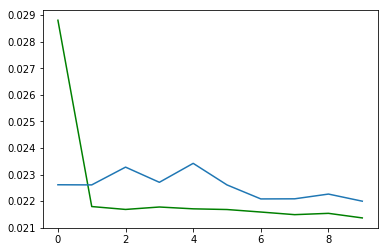

In [257]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'])

In [258]:
loss, error = model.evaluate(xtest,ytest)
loss,error

1287/1287 [==============================] - 0s 42us/step


(0.02089995533595529, 0.11851741874296719)

In [259]:
model.evaluate(xtrain, ytrain)

5148/5148 [==============================] - 0s 37us/step


[0.021579300939874677, 0.11942149259919979]

In [260]:
a = model.predict(xtrain[:5]) * ymax

In [261]:
b= ytrain[:5] * ymax

In [262]:
error*ymax

452580.8610427448

In [87]:
a

array([[ 686553.2],
       [1242569.8],
       [ 705630.7],
       [1376893.2],
       [1427253.6]], dtype=float32)

In [88]:
a - np.array(b).reshape(len(b),1)

array([[ -678168.3925],
       [-1016046.49  ],
       [  351398.3475],
       [  394571.01  ],
       [ -297303.595 ]])

In [89]:
test_predictions = model.predict(datatest)


In [90]:
model.save('walmart-trained1.h5')

In [48]:
test_predictions*ymax

array([[ -596353.5  ],
       [-1323018.8  ],
       [ -782196.44 ],
       ...,
       [  101573.79 ],
       [  101573.79 ],
       [  -13968.401]], dtype=float32)